# Day 2

## Multiple linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import os
os.listdir()

['kc_house_data.csv', 'Day_2.ipynb', '.ipynb_checkpoints']

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Independent varivable -> IV
# Sependent varivable -> DV

In [11]:
# 1st check scatterplots b/w IVs and DV
# then check IV IV scatterplots

In [12]:
# Problems to remove -> Multicollinearity( two IVs are correlated )
# and Reduce Overfitting and underfitting

## Feature Scaling
- Making Sure Features are on right scale.
- Get every feature into scale -1 $\leq$ $x_{i}$ $\leq$ 1
- X = (X - np.mean(X))/np.std(X)

## Mean Normalisation
- replace $x_i$ with $x_i$ $-$ $u_i$

In [32]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#dropping the id and date column
data = data.drop(['id','date'],axis=1)


In [8]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


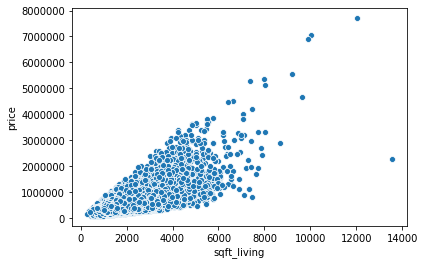

In [9]:
sns.scatterplot(x='sqft_living',y='price',data=data)

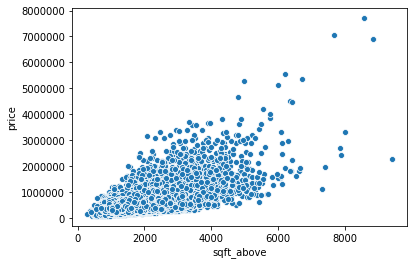

In [10]:
sns.scatterplot(x='sqft_above',y='price',data=data)

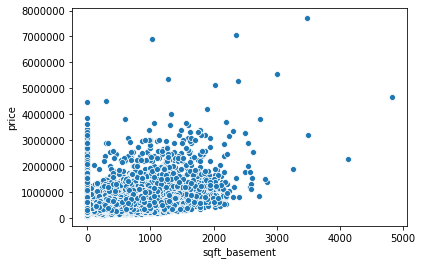

In [11]:
sns.scatterplot(x='sqft_basement',y='price',data=data)

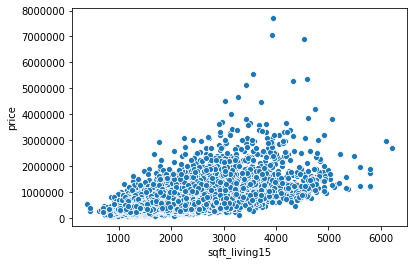

In [12]:
sns.scatterplot(x='sqft_living15',y='price',data=data)

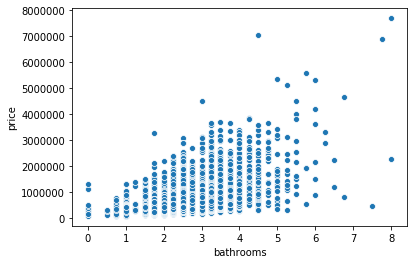

In [13]:
sns.scatterplot(x='bathrooms',y='price',data=data)

In [32]:
X1 = data.loc[:,'sqft_living']
# X2 = data.loc[:,'sqft_above']
# X3 = data.loc[:,'sqft_basement']
# X4 = data.loc[:,'sqft_living15']
X5 = data.loc[:,'bathrooms']
Y = data.loc[:,'price']

In [33]:
X1 = (X1-np.mean(X1))/np.std(X1)

In [35]:
X5 = (X5-np.mean(X5))/np.std(X5)


In [38]:
Y = (Y-np.mean(Y))/np.std(Y)

In [39]:
X = pd.concat([X1, X5], axis=1)

In [40]:
X

,sqft_living,bathrooms
0,-0.979835,-1.447464
1,0.533634,0.175607
2,-1.426254,-1.447464
3,-0.130550,1.149449
4,-0.435422,-0.149007
...,...,...
21608,-0.598746,0.500221
21609,0.250539,0.500221
21610,-1.154047,-1.772078
21611,-0.522528,0.500221


In [41]:
m = len(Y)
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha=0.01
iters = 500
theta = np.zeros((3,1))
Y = Y[:,np.newaxis]

In [43]:
def computeCost(X,y,theta):
    temp = np.dot(X,theta) -y
    return np.sum(np.power( temp,2 ))/2*m

In [44]:
J = computeCost(X,Y,theta)
print(J)

233560884.50000015


In [50]:
def gradientDescentMulti(X,y,theta,alpha,iters):
    m = len(y)
    for _ in range(iters):
        temp = np.dot(X,theta) - y
        temp = np.dot(X.T,temp)
        theta = theta -(alpha/m)*temp
    return theta

In [51]:
theta = gradientDescentMulti(X, Y, theta, alpha, iters)
print(theta)

[[-1.46793336e-16]
 [ 6.04591251e-01]
 [ 9.46856043e-02]]


In [52]:
J = computeCost(X, Y, theta)
print(J)

119715084.87609158


In [53]:
val = np.dot(X,theta)

In [58]:
A = pd.concat([X1, X5], axis=1)

In [60]:
A['price'] = Y
A

,sqft_living,bathrooms,price
0,-0.979835,-1.447464,-0.866717
1,0.533634,0.175607,-0.005688
2,-1.426254,-1.447464,-0.980849
3,-0.130550,1.149449,0.174090
4,-0.435422,-0.149007,-0.081958
...,...,...,...
21608,-0.598746,0.500221,-0.490545
21609,0.250539,0.500221,-0.381588
21610,-1.154047,-1.772078,-0.375865
21611,-0.522528,0.500221,-0.381588


In [61]:
A['predicted_price'] = val

In [62]:
A

,sqft_living,bathrooms,price,predicted_price
0,-0.979835,-1.447464,-0.866717,-0.729454
1,0.533634,0.175607,-0.005688,0.339258
2,-1.426254,-1.447464,-0.980849,-0.999355
3,-0.130550,1.149449,0.174090,0.029907
4,-0.435422,-0.149007,-0.081958,-0.277361
...,...,...,...,...
21608,-0.598746,0.500221,-0.490545,-0.314633
21609,0.250539,0.500221,-0.381588,0.198838
21610,-1.154047,-1.772078,-0.375865,-0.865517
21611,-0.522528,0.500221,-0.381588,-0.268552


In [64]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(A.iloc[:,2],A.iloc[:,3] )))

0.7159363005212717


## Scitkit learn

In [65]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [66]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [67]:
y = data['price']
x = data[['sqft_living','bathrooms']]

In [68]:
linear_reg = LinearRegression()

In [69]:
linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_pred = linear_reg.predict(x)
y_pred

array([290371.1960665 , 678525.14930877, 173975.52804765, ...,
       246239.64645762, 401858.88218276, 246239.64645762])

In [73]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,221900.0,290371.196067
1,538000.0,678525.149309
2,180000.0,173975.528048
3,604000.0,501477.656329
4,510000.0,427152.532252
...,...,...
21608,360000.0,381986.451058
21609,400000.0,603422.112167
21610,402101.0,246239.646458
21611,400000.0,401858.882183


In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 173697.0219798529
Mean Squared Error: 68344476440.64705
Root Mean Squared Error: 261427.76524433485
